In [1]:
import numpy as np
import math
import pandas as pd

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 5]
plt.rc('legend',fontsize=15) 

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model

In [3]:
import pickle

In [4]:
import scipy
from scipy.stats import rv_histogram

import seaborn as sns

### Functions - common for each notebook

In [5]:
from basic_functions import trajectory, trajectory_intervals, generate_nn_input, check_distribution, plot_distribution

### Functions - modified for each case

In [6]:
def trajectories(T, n, k, Wiener=None):
  
    h = float(T/n)
    h_sqrt = np.sqrt(h)
    X_real = []
    X_approx = []
    T_ = []
  
    for j in range(k):
        
        X_real_temp = x_0
        X_approx_temp = x_0

        x_real = [X_real_temp]
        x_approx = [X_approx_temp]

        t_temp = 0.0
        t = [t_temp]
        
        for i in range(1, n+1):

            if Wiener is not None:
                dW = Wiener[i-1]

            else:
                dW = np.random.normal(0, h_sqrt)

            X_r = X_real_temp + a(t_temp, X_real_temp)*h + b_real(t_temp, X_real_temp)*dW
            x_real.append(X_r)  

            X_a = X_approx_temp + a(t_temp, X_approx_temp)*h + sigma_[i]*dW
            x_approx.append(X_a)  
 
            t_temp = i*h
            t.append(t_temp)

            X_real_temp = X_r
            X_approx_temp = X_a

        X_real.append(x_real)
        X_approx.append(x_approx)


        T_.append(t)

        if (len(np.array(X_real).flatten()) != len(np.array(X_approx).flatten())):
            print("Trajectories have different length")
      
    return np.array(T_).flatten(), np.array(X_real).flatten(), np.array(X_approx).flatten()

In [7]:
def trajectories_intervals(T, n, k, Wiener=None):
  
    h = float(T/n)
    h_sqrt = np.sqrt(h)
    # values_in_T = []
    X_real = []
    X_approx = []
    
    X_approx_lower_ = []
    X_approx_upper_ = []
    
    
    T_ = []
  
    for j in range(k):
        
        X_real_temp = x_0
        X_approx_temp = x_0

        x_real = [X_real_temp]
        x_approx = [X_approx_temp]
        x_approx_lower = [X_approx_temp]
        x_approx_upper = [X_approx_temp]

        t_temp = 0.0
        t = [t_temp]
        
        for i in range(1, n+1):

            if Wiener is not None:
                dW = Wiener[i-1]

            else:
                dW = np.random.normal(0, h_sqrt)

            X_r = X_real_temp + a(t_temp, X_real_temp)*h + b_real(t_temp, X_real_temp)*dW
            x_real.append(X_r)  

            X_a = X_approx_temp + a(t_temp, X_approx_temp)*h + sigma_[i]*dW
            x_approx.append(X_a)  
            

            X_a_lower = X_approx_temp + a(t_temp, X_approx_temp) * h - 2 * np.abs(sigma_[i]) * np.sqrt(h)
            X_a_upper = X_approx_temp + a(t_temp, X_approx_temp) * h + 2 * np.abs(sigma_[i]) * np.sqrt(h)
            x_approx_lower.append(X_a_lower)  
            x_approx_upper.append(X_a_upper)  
        

            t_temp = i*h
            t.append(t_temp)

            X_real_temp = X_r
            X_approx_temp = X_a

        X_real.append(x_real)
        X_approx.append(x_approx)
        X_approx_lower_.append(x_approx_lower)
        X_approx_upper_.append(x_approx_upper)


        T_.append(t)

        if (len(np.array(X_real).flatten()) != len(np.array(X_approx).flatten())):
            print("Trajectories have different length")
      
    return np.array(T_).flatten(), np.array(X_real).flatten(), np.array(X_approx).flatten(), np.array(X_approx_lower_).flatten(), np.array(X_approx_upper_).flatten()

### Step 1. Define an equation

In [8]:
def kappa(t):
    return 2.0

def mu(t):
    return 0.5

def sigma(t):
    return 2*t+0.4+1.5*np.sin(t*4)

In [9]:
def a(t, x):
    return mu(t)-kappa(t)*np.sign(x)

def b(t, x):
    return sigma(t)

In [10]:
x_0 = 1.0

In [11]:
equation = [x_0, a, b]

### Step 2. Simulation

In [12]:
# time
T = 2.0

# number of points
n = 10000

# number of trajectories
k = 1

In [13]:
# set the Wiener process

h = float(T/n)
h_sqrt = np.sqrt(h)

wiener_process = [np.random.normal(0, h_sqrt) for i in range(n)]

# file = open('wiener_process_example_03', 'wb')
# pickle.dump(wiener_process, file)
# file.close()

In [14]:
t_values, x_values = trajectory(T, n, k, equation, wiener_process)

In [15]:
t_values, x_values, x_low, x_up = trajectory_intervals(T, n, k, equation, wiener_process)

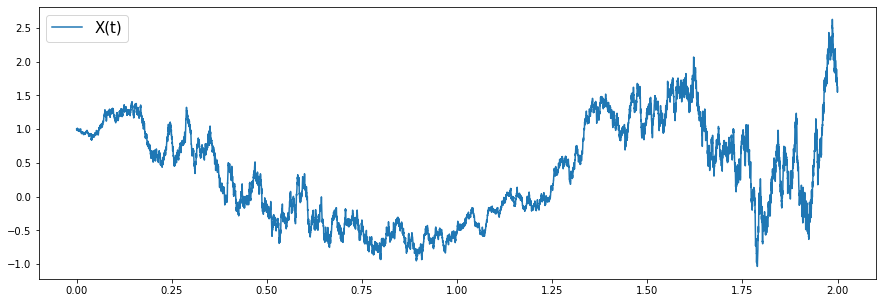

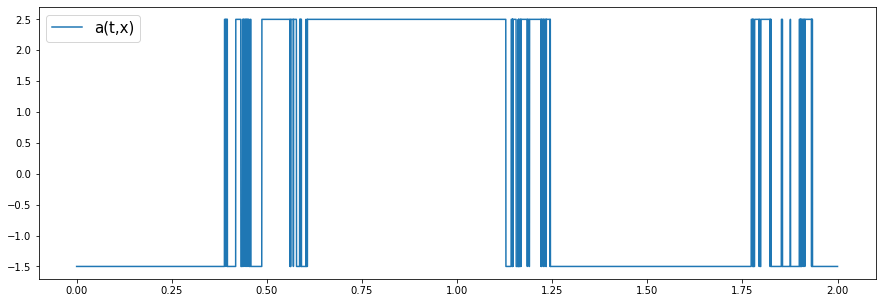

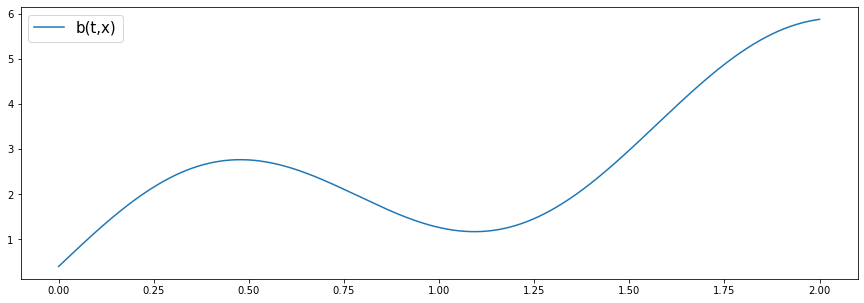

In [16]:
plt.plot(t_values, x_values, label='X(t)')
plt.legend()
plt.show()

plt.plot(t_values, a(t_values,x_values), label='a(t,x)')
plt.legend()
plt.show()

plt.plot(t_values, b(t_values,x_values), label='b(t,x)')
plt.legend()
plt.show()

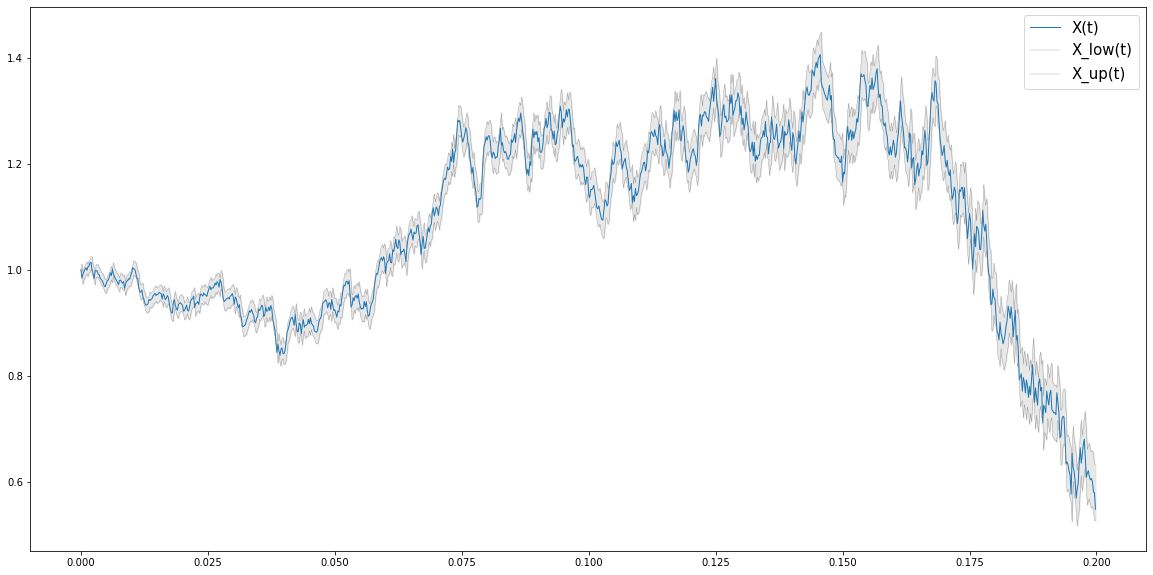

In [17]:
k = 1000

t = t_values[:k]
x1=x_values[:k]
x2=x_low[:k]
x3=x_up[:k]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='X(t)', linewidth=1)
plt.plot(t, x2, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x3, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t_values[:1000], x2, x3, color='lightgrey',alpha=0.5)


plt.legend()
plt.show()

### Step 3. Estimate chosen parameter using neural network

#### 3.1 Loss function

In [18]:
def b_(t, x, sigma):
    return sigma

In [19]:
# define loss function that corresponds to NLL (Negative Log Likelihood)
# h - global variable, as also  coefficients a ,b, 
# x_0,x_1,...x_n, y_true = [x_0,x_1,...x_n], delta_y_true = [x_1-x_0,x_2-x_1,...x_n-x_{n-1}]

def SDE_params_loss(y_true,y_pred):

    sigma=tf.math.exp(tf.slice(y_pred,[0,0],[-1,1]))
    x_diff = tf.slice(y_true,[0,2],[-1,1])
    h = tf.slice(y_true,[0,3],[-1,1])

    x = tf.slice(y_true,[0,1],[-1,1])
    t = tf.slice(y_true,[0,0],[-1,1])

    A = tf.math.log(2*math.pi*h*tf.square((b_(t,x,sigma))))
    B = tf.square(x_diff - a_(t,x)*h) / (2*h * tf.square(b_(t,x,sigma)))
    loss = tf.reduce_sum(A/2.0+B,axis=0)

    return loss

#### 3.2 Neural network model

In [20]:
x_data, y_data = generate_nn_input(t_values, x_values)

In [21]:
model =  Sequential()
model.add(Dense(20, activation='sigmoid',batch_input_shape=(None, 1)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(loss=SDE_params_loss,
              optimizer=optimizers.Adam(learning_rate=0.005),
              metrics=[SDE_params_loss])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                40        
                                                                 
 dense_1 (Dense)             (None, 50)                1050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [23]:
plot_model(model, to_file='model_02_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


#### 3.3 Training

In [24]:
def a_(t, x):
    return mu(t)-kappa(t)*tf.sign(x)

In [25]:
history=model.fit(x_data, y_data, 
                  batch_size=64, 
                  epochs=100,
                  verbose=1
                 )

Epoch 1/100
157/157 [==============================] - 3s 4ms/step - loss: -116.6447 - SDE_params_loss: -116.2374
Epoch 2/100
157/157 [==============================] - 1s 3ms/step - loss: -119.8610 - SDE_params_loss: -119.4498
Epoch 3/100
157/157 [==============================] - 1s 3ms/step - loss: -120.3625 - SDE_params_loss: -119.9506
Epoch 4/100
157/157 [==============================] - 0s 3ms/step - loss: -119.8019 - SDE_params_loss: -119.3740
Epoch 5/100
157/157 [==============================] - 0s 3ms/step - loss: -120.6332 - SDE_params_loss: -120.1955
Epoch 6/100
157/157 [==============================] - 0s 3ms/step - loss: -120.3576 - SDE_params_loss: -119.9016
Epoch 7/100
157/157 [==============================] - 1s 3ms/step - loss: -121.1783 - SDE_params_loss: -120.7509
Epoch 8/100
157/157 [==============================] - 1s 3ms/step - loss: -121.5478 - SDE_params_loss: -121.1290
Epoch 9/100
157/157 [==============================] - 1s 3ms/step - loss: -122.0260 - S

In [26]:
result = model.predict(t_values)
sigma_ = tf.math.exp(result[:,0])

file = open('sigma_example_02', 'wb')
pickle.dump(sigma_, file)
file.close()

### Step 4. Evaluation of the results

#### 4.1 Results from neural network

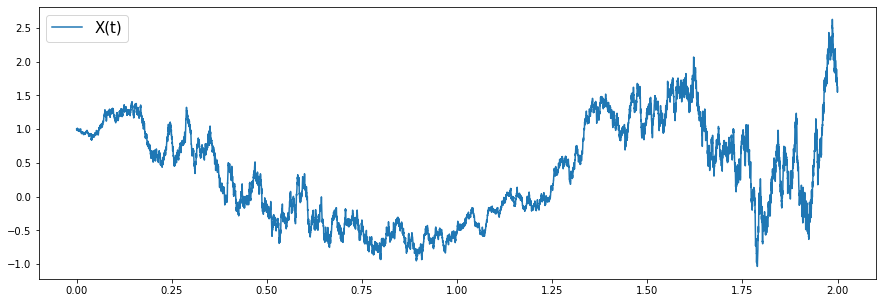

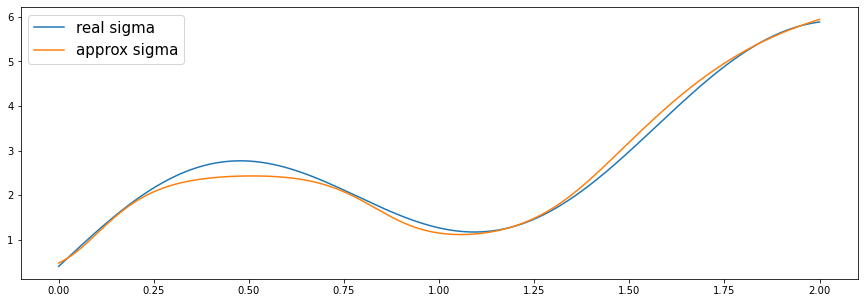

In [27]:
file = open('sigma_example_02', 'rb')
sigma_ = pickle.load(file)
file.close()

plt.plot(t_values, x_values, label='X(t)')
plt.legend()
plt.show()

plt.plot(t_values, sigma(t_values), label='real sigma')
plt.plot(t_values, sigma_, label='approx sigma')
plt.legend()

# plt.savefig("example_02_sigma.png")
# plt.show()

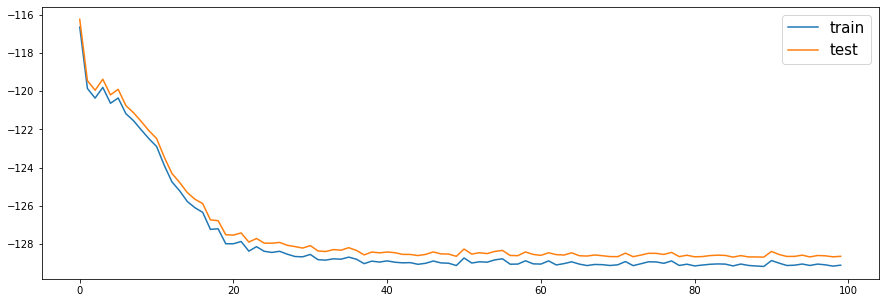

In [28]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['SDE_params_loss'], label='test')
plt.legend()
plt.show()

#### 4.2 Trajectories of both processes with prediction intervals

In [29]:
def b_real(t, x):
    return sigma(t)

In [30]:
def b_approx(t):
    return sigma_

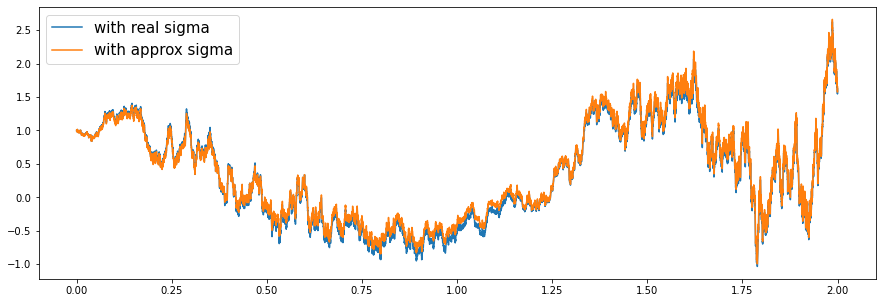

In [31]:
t_values, x_real_values, x_approx_values = trajectories(T,n,1,wiener_process)

fig = plt.figure(figsize=(15,5))
plt.plot(t_values, x_real_values, label='with real sigma')
plt.plot(t_values, x_approx_values, label='with approx sigma')
plt.legend()

plt.savefig("example_02_trajectory.png")
plt.show()

In [32]:
t_values, x_real_values, x_approx_values, x_approx_low_values, x_approx_up_values = trajectories_intervals(T,n,1,wiener_process)

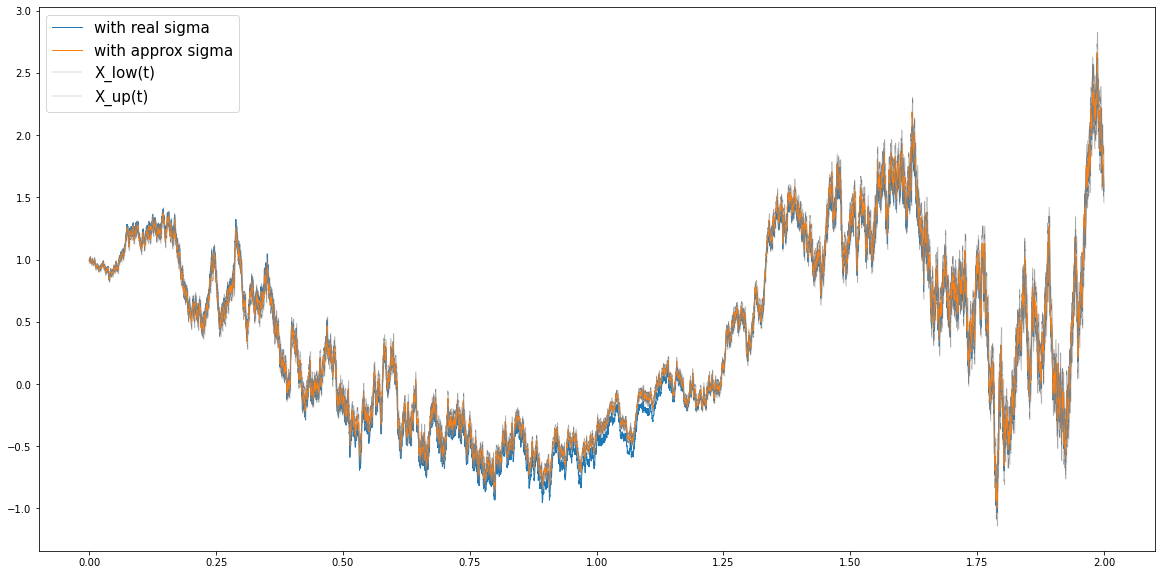

In [33]:
k = n

t = t_values[:k]
x1=x_real_values[:k]
x2=x_approx_values[:k]
x3=x_approx_low_values[:k]
x4=x_approx_up_values[:k]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='with real sigma', linewidth=1)
plt.plot(t, x2, label='with approx sigma', linewidth=1)
plt.plot(t, x3, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x4, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t, x3, x4, color='lightgrey',alpha=0.5)

plt.legend()
plt.show()

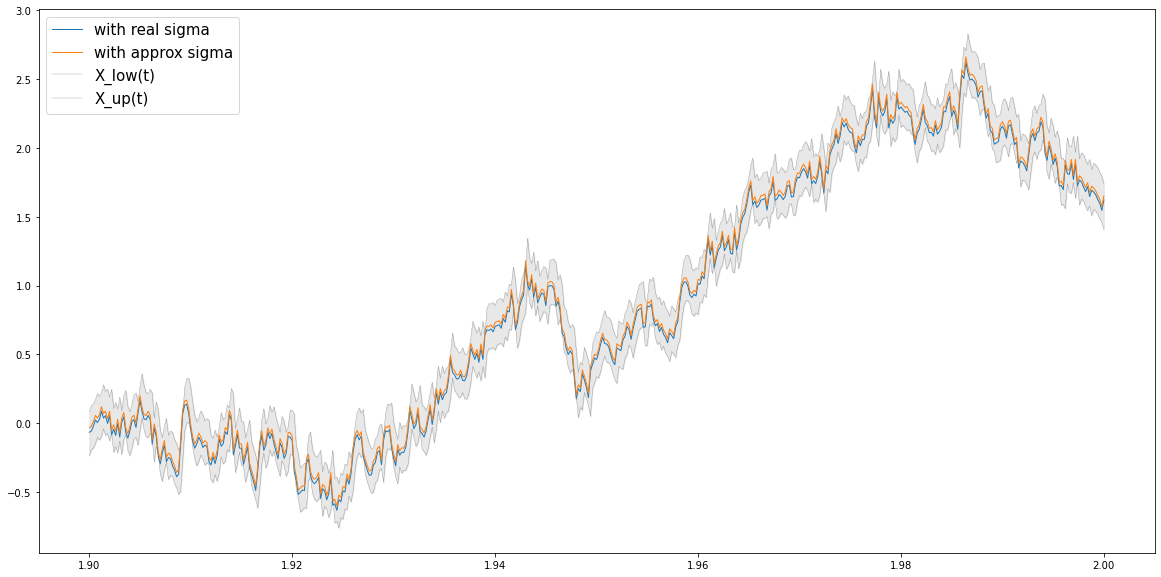

In [34]:
k = 500

t = t_values[n-k:]
x1=x_real_values[n-k:]
x2=x_approx_values[n-k:]
x3=x_approx_low_values[n-k:]
x4=x_approx_up_values[n-k:]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='with real sigma', linewidth=1)
plt.plot(t, x2, label='with approx sigma', linewidth=1)
plt.plot(t, x3, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x4, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t, x3, x4, color='lightgrey',alpha=0.5)

# plt.scatter(x=t, y=tempdf["expected_col"], color="red")

plt.legend()
plt.show()

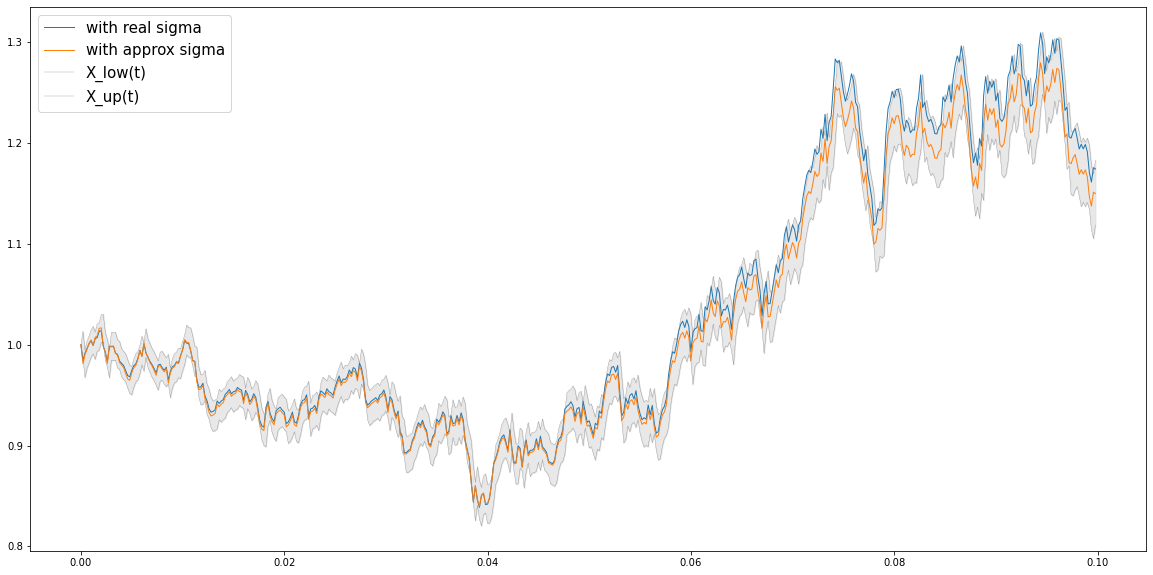

In [35]:
k = 500

t = t_values[:k]
x1=x_real_values[:k]
x2=x_approx_values[:k]
x3=x_approx_low_values[:k]
x4=x_approx_up_values[:k]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='with real sigma', linewidth=1)
plt.plot(t, x2, label='with approx sigma', linewidth=1)
plt.plot(t, x3, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x4, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t, x3, x4, color='lightgrey',alpha=0.5)

plt.legend()
plt.show()

#### 4.3 Simulate many trajectories to see both distributions

In [38]:
n_traj = 100

In [39]:
X_tab, X_approx_tab = check_distribution(T, n, n_traj, trajectories)

Mean value for real:  0.8601875627396606
Mean value for approx:  0.8454523217864335
Standard deviation for real:  3.293359961312977
Standard deviation for approx:  3.3299368363452997


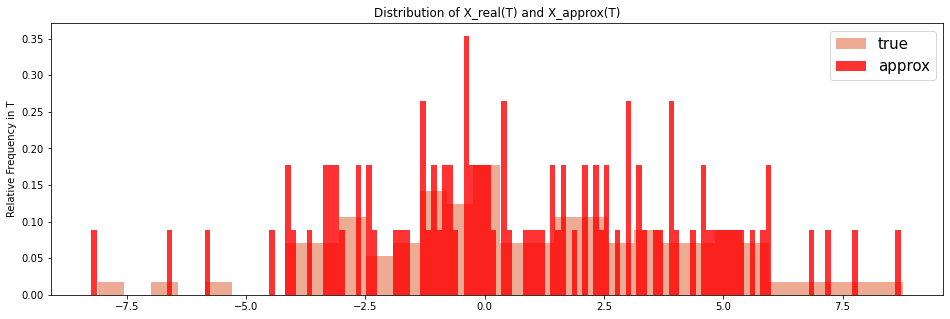

In [40]:
plot_distribution(X_tab, X_approx_tab)

In [41]:
def exp_val_approx(X, X_approx):
    return sum(np.square(np.abs(np.subtract(X,X_approx))))/len(X)

In [42]:
exp_val_approx(X_tab, X_approx_tab)

0.027616667116156814

In [43]:
np.sqrt(exp_val_approx(X_tab, X_approx_tab))

0.1661826318125839

In [44]:
# SAVE DATA AS PICKLE

result_tab = np.array([X_tab, X_approx_tab])

# open a file, where you ant to store the data
file = open('02_results_100', 'wb')

# dump information to that file
pickle.dump(result_tab, file)

# close the file
file.close()

In [45]:
# OPEN IF NEEDED

# open a file, where you stored the pickled data
# file = open('results_1000', 'rb')

# # dump information to that file
# data = pickle.load(file)

# # close the file
# file.close()

In [46]:
# X_test = data[0]
# X_approx_test = data[1]

#### 4.4 Check our Theorem 1

In [47]:
# theta_1 
theta_approx = sigma_

In [48]:
# theta_2 
t_values = np.linspace(0,T,n+1)
theta_real = sigma(t_values)

In [49]:
# LEFT SIDE
np.sqrt(exp_val_approx(X_tab, X_approx_tab))

0.1661826318125839

In [50]:
# RIGHT SIDE
2*np.abs(theta_approx - theta_real).max()

0.6883645057678223

#### 4.5 Check Kolmogorov-Smirnov (KS) test

In [51]:
scipy.stats.ks_2samp(X_tab, X_approx_tab)

KstestResult(statistic=0.04, pvalue=0.999998821968263)

#### 4.6 QQ plot

In [52]:
df_pct = pd.DataFrame()
df_pct['q_X'] = np.percentile(X_tab, range(100))
df_pct['q_X_approx'] = np.percentile(X_approx_tab, range(100))

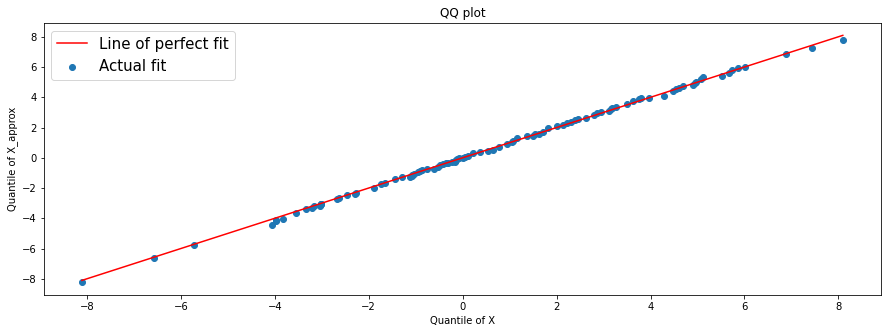

In [53]:
plt.scatter(x='q_X', y='q_X_approx', data=df_pct, label='Actual fit')
sns.lineplot(x='q_X', y='q_X', data=df_pct, color='r', label='Line of perfect fit')
plt.xlabel('Quantile of X')
plt.ylabel('Quantile of X_approx')
plt.legend()
plt.title("QQ plot")
plt.savefig("example_03_qq-plot.png")